# Task 4: Actor-Critic test best A2C models on CartPole-v0

In [5]:
import numpy as np

from IPython.display import clear_output

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import torch
import torch.nn as nn

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Reproducible results
torch.manual_seed(0)

import gym

from actor_critic import ActorCritic
import os

In [6]:
def sample_one_episode(env: gym.Env, model: ActorCritic):
    state = env.reset()
    done = False

    total_reward = 0

    while not done:
        state = torch.unsqueeze(torch.FloatTensor(state), 0).to(device)
        probability_dist, values = model(state)
        action_to_take = probability_dist.sample()
        next_state, reward, done, _ = env.step(action_to_take.cpu().detach().numpy()[0])
        state = next_state

        total_reward += reward

    return total_reward

## Test the CartPole-v0 best model on CartPole-v0

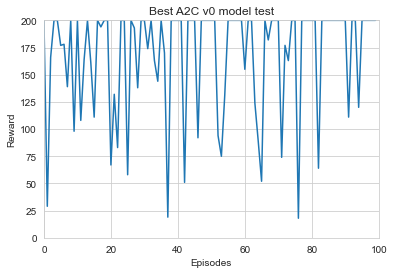

In [14]:
# Load
PATH = "results/CartPole-v0/best_model/num_env24-num_episodes100000-learning_rate0.002-hidden_layers128-128.pt"

model_load = torch.load(PATH)
model_load.eval()

model_load.state_dict()
model_load_env = gym.make("CartPole-v0")
state = model_load_env.reset()
model_load_env.seed(0)

model_load_total_rewards = []

for _ in range(100):
    model_load_rewards = sample_one_episode(env=model_load_env,model=model_load)
    model_load_total_rewards.append(model_load_rewards)
    
model_load_total_rewards

plt.title(f"Best A2C v0 model test");
plt.xlabel("Episodes");
plt.ylabel("Reward");
plt.ylim([0, 200]);
plt.xlim([0, 100]);
plt.plot(model_load_total_rewards);
plt.savefig("results/CartPole-v0/best_model/best_model_rewards.png", dpi=300, bbox_inches="tight");
plt.show();

In [17]:
min(model_load_total_rewards), max(model_load_total_rewards), np.std(model_load_total_rewards), np.mean(model_load_total_rewards)

(27.0, 200.0, 46.32705041333842, 171.62)

## Test the CartPole-v1 best model on CartPole-v0

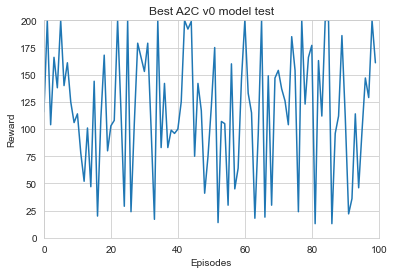

In [18]:
# Load
PATH = "results/CartPole-v1/best_model/num_env24-num_episodes100000-learning_rate0.003-hidden_layers128-128.pt"

model_load = torch.load(PATH)
model_load.eval()

model_load.state_dict()
model_load_env = gym.make("CartPole-v0")
state = model_load_env.reset()
model_load_env.seed(0)

model_load_total_rewards = []

for _ in range(100):
    model_load_rewards = sample_one_episode(env=model_load_env,model=model_load)
    model_load_total_rewards.append(model_load_rewards)
    
model_load_total_rewards

plt.title(f"Best A2C v0 model test");
plt.xlabel("Episodes");
plt.ylabel("Reward");
plt.ylim([0, 200]);
plt.xlim([0, 100]);
plt.plot(model_load_total_rewards);
plt.savefig("results/CartPole-v0/best_model/best_model_rewards_v1.png", dpi=300, bbox_inches="tight");
plt.show();

In [19]:
min(model_load_total_rewards), max(model_load_total_rewards), np.std(model_load_total_rewards), np.mean(model_load_total_rewards)

(13.0, 200.0, 56.20452917692666, 118.03)

## Test the best CartPole-v0 model on CartPole-v1

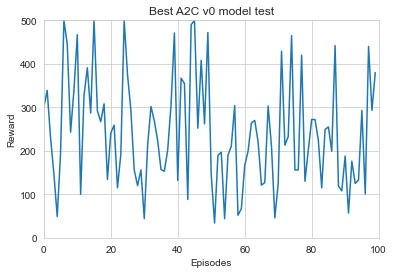

In [25]:
# Load
PATH = "results/CartPole-v0/best_model/num_env24-num_episodes100000-learning_rate0.002-hidden_layers128-128.pt"

model_load = torch.load(PATH)
model_load.eval()

model_load.state_dict()
model_load_env = gym.make("CartPole-v1")
state = model_load_env.reset()
model_load_env.seed(0)

model_load_total_rewards = []

for _ in range(100):
    model_load_rewards = sample_one_episode(env=model_load_env,model=model_load)
    model_load_total_rewards.append(model_load_rewards)
    
model_load_total_rewards

plt.title(f"Best A2C v0 model test");
plt.xlabel("Episodes");
plt.ylabel("Reward");
plt.ylim([0, 500]);
plt.xlim([0, 100]);
plt.plot(model_load_total_rewards);
plt.savefig("results/CartPole-v0/best_model/best_model_rewards_v0_on_v1.png", dpi=300, bbox_inches="tight");
plt.show();

In [23]:
min(model_load_total_rewards), max(model_load_total_rewards), np.std(model_load_total_rewards), np.mean(model_load_total_rewards)

(28.0, 500.0, 138.90955906632198, 271.12)